## Installing Rquired libraries

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


## Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

## Loading the Data

In [7]:
data_asia_cup=pd.read_csv('asia_cup_data/asiacup.csv')
champion_data = pd.read_csv('asia_cup_data/champion.csv')
wkd = pd.read_csv('asia_cup_data/wicketkeeper data odi.csv')
bat_data = pd.read_csv('asia_cup_data/batsman data odi.csv')
ball_data = pd.read_csv('asia_cup_data/bowler data odi.csv')

## Data Preprocessing

In [8]:
#checking the data 
data_asia_cup.head()

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win


In [9]:
shaped = data_asia_cup.shape
print(f'There are {shaped[1]} columns in the dataset')

There are 20 columns in the dataset


In [10]:
data_asia_cup.columns

Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')

In [11]:
#checking for duplicated data
data_asia_cup.duplicated().sum()

0

There is no duplicated data in the data set

In [12]:
#checking for null values
data_asia_cup.isna().sum()

Team                         0
Opponent                     0
Format                       0
Ground                       0
Year                         0
Toss                         0
Selection                    0
Run Scored                   2
Wicket Lost                  2
Fours                        2
Sixes                        2
Extras                       2
Run Rate                     2
Avg Bat Strike Rate          2
Highest Score                2
Wicket Taken                 2
Given Extras                 2
Highest Individual wicket    2
Player Of The Match          2
Result                       0
dtype: int64

There are very few null values so they can be ignored

In [13]:
data_asia_cup.describe()

,Year,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket
count,254.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2006.905512,201.920635,6.892857,15.626984,2.912698,13.238095,5.308214,76.676667,69.309524,6.892857,13.238095,2.563492
std,11.014495,67.331860,2.874609,7.754946,2.596411,7.621973,1.584823,30.678228,29.813488,2.874609,7.621973,1.100496
min,1984.000000,38.000000,0.000000,0.000000,0.000000,0.000000,2.200000,24.630000,8.000000,0.000000,0.000000,0.000000
25%,1997.750000,147.000000,5.000000,10.000000,1.000000,8.000000,4.227500,54.742500,47.000000,5.000000,8.000000,2.000000
50%,2008.000000,193.000000,7.000000,15.000000,2.000000,12.000000,5.090000,73.155000,66.500000,7.000000,12.000000,3.000000
75%,2016.000000,253.250000,10.000000,20.000000,4.250000,18.000000,6.100000,92.897500,85.000000,10.000000,18.000000,3.000000
max,2022.000000,385.000000,10.000000,41.000000,14.000000,38.000000,10.600000,194.050000,183.000000,10.000000,38.000000,6.000000


There are no outliers in the data

In [14]:
bat_data.columns

Index(['Player Name', 'Country', 'Time Period', 'Matches', 'Played',
       'Not Outs', 'Runs', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Strike Rate', 'Centuries', 'Fifties', 'Ducks', 'Fours', 'Sixes'],
      dtype='object')

In [15]:
bat_data.drop(['Balls Faced'],axis=1,inplace=True)

In [16]:
bat_data.isna().sum()

Player Name        0
Country            0
Time Period        0
Matches            0
Played             0
Not Outs           0
Runs               0
Highest Score      0
Batting Average    0
Strike Rate        0
Centuries          0
Fifties            0
Ducks              0
Fours              0
Sixes              0
dtype: int64

There are no null values in the data set

In [17]:
bat_data.duplicated().sum()

0

There is no duplicated data in the data set

In [18]:
bat_data.describe()

,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.060000,13.120000,2.100000,487.340000,99.360000,50.031000,83.677800,0.920000,3.160000,0.580000,42.780000,6.660000
std,5.563768,5.137457,1.887121,215.852237,27.467799,32.193085,15.652533,1.209486,1.909803,0.702474,25.264551,5.542452
min,4.000000,3.000000,0.000000,250.000000,50.000000,21.000000,55.600000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,10.250000,9.250000,1.000000,317.000000,76.500000,35.482500,76.275000,0.000000,2.000000,0.000000,26.250000,3.000000
50%,13.000000,12.000000,2.000000,443.500000,100.000000,44.420000,82.955000,1.000000,3.000000,0.000000,38.500000,5.000000
75%,17.750000,14.750000,3.000000,586.500000,115.500000,58.125000,89.792500,1.000000,4.000000,1.000000,50.500000,8.750000
max,28.000000,26.000000,6.000000,1220.000000,183.000000,251.000000,140.740000,6.000000,8.000000,3.000000,139.000000,26.000000


There are no outliers in the data

In [19]:
ball_data.columns

Index(['Player Name', 'Country', 'Time Period', 'Matches', 'Played', 'Overs',
       'Maiden Overs', 'Runs', 'Wickets', 'Best Figure', 'Bowling Average',
       'Economy Rate', 'Strike Rate', 'Four Wickets', 'Five Wickets'],
      dtype='object')

In [20]:
ball_data.drop(['Overs','Four Wickets'],axis=1,inplace=True)

In [21]:
ball_data.isna().sum()

Player Name        0
Country            0
Time Period        0
Matches            0
Played             0
Maiden Overs       0
Runs               0
Wickets            0
Best Figure        0
Bowling Average    0
Economy Rate       0
Strike Rate        0
Five Wickets       0
dtype: int64

There are no null values in the data set

In [22]:
ball_data.duplicated().sum()

0

There is no duplicated data in the data set

In [23]:
ball_data.describe()

,Matches,Played,Maiden Overs,Runs,Wickets,Bowling Average,Economy Rate,Strike Rate,Five Wickets
count,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,11.622222,10.977778,4.888889,407.40000,14.622222,28.798889,4.607778,37.073333,0.222222
std,5.737789,4.974886,3.632068,196.16753,5.737789,11.356828,0.761093,12.422604,0.598820
min,4.000000,4.000000,0.000000,120.00000,9.000000,10.420000,3.220000,15.600000,0.000000
25%,7.000000,7.000000,2.000000,263.00000,10.000000,20.550000,4.150000,27.700000,0.000000
50%,11.000000,10.000000,5.000000,331.00000,13.000000,26.570000,4.440000,35.400000,0.000000
75%,14.000000,14.000000,6.000000,505.00000,17.000000,36.180000,5.080000,45.200000,0.000000
max,25.000000,24.000000,20.000000,883.00000,30.000000,63.070000,6.870000,76.200000,3.000000


There are no outliers in the data

In [24]:
wkd.columns

Index(['Player Name', 'Country', 'Time Period', 'Matches', 'Played',
       'Dismissals', 'Catches', 'Stumpings', 'Maximum Dismissals'],
      dtype='object')

In [25]:
wkd.isna().sum()

Player Name           0
Country               0
Time Period           0
Matches               0
Played                0
Dismissals            0
Catches               0
Stumpings             0
Maximum Dismissals    0
dtype: int64

There are no null values in the data set

In [26]:
wkd.duplicated().sum()

0

There is no duplicated data in the data set

In [27]:
wkd.describe()

,Matches,Played,Dismissals,Catches,Stumpings,Maximum Dismissals
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,6.775000,5.12500,6.325000,4.850000,1.475000,2.175000
std,6.298097,5.57553,8.112629,6.032179,2.298132,1.217132
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.00000,2.000000,1.000000,0.000000,1.750000
50%,4.500000,3.00000,3.000000,3.000000,1.000000,2.000000
75%,9.750000,5.25000,7.000000,5.500000,2.000000,3.000000
max,24.000000,24.00000,36.000000,27.000000,11.000000,5.000000


There are no outliers in the data

In [28]:
champion_data.columns

Index(['Year', 'Host', 'No Of Team', 'Champion', 'Runner Up',
       'Player Of The Series', 'Highest Run Scorer', 'Highest Wicket Taker'],
      dtype='object')

In [29]:
champion_data.drop(['No Of Team'],axis=1,inplace=True)

In [30]:
champion_data.isna().sum()

Year                    0
Host                    0
Champion                0
Runner Up               0
Player Of The Series    0
Highest Run Scorer      0
Highest Wicket Taker    0
dtype: int64

There are no null values in the data set

In [31]:
champion_data.duplicated().sum()

0

There is no duplicated data in the data set

## Interpretations

In [32]:
#decision of the Toss winner
toss_selection = data_asia_cup['Selection'].value_counts()
print(toss_selection)

Batting    127
Bowling    127
Name: Selection, dtype: int64


In [33]:
#average runs scored, Wicket lost and Extras in Asia cup
print(f"The average runs scored : {data_asia_cup['Run Scored'].mean()}")
print(f"The average high score : {data_asia_cup['Highest Score'].mean()}")
print(f"The average wickets lost: {data_asia_cup['Wicket Lost'].mean()}")
print(f"The average Extras Given: {data_asia_cup['Extras'].mean()}")

The average runs scored : 201.9206349206349
The average high score : 69.30952380952381
The average wickets lost: 6.892857142857143
The average Extras Given: 13.238095238095237


### Batsmens Interpreatations

In [34]:
#Batsmens data
bat_data.head()

,Player Name,Country,Time Period,Matches,Played,Not Outs,Runs,Highest Score,Batting Average,Strike Rate,Centuries,Fifties,Ducks,Fours,Sixes
0,ST Jayasuriya,Sri Lanka,1990-2008,25,24,1,1220,130,53.04,102.52,6,3,1,139,23
1,KC Sangakkara,Sri Lanka,2004-2014,24,23,1,1075,121,48.86,84.51,4,8,2,107,7
2,SR Tendulkar,India,1990-2012,23,21,2,971,114,51.10,85.47,2,7,0,108,8
3,Shoaib Malik,Pakistan,2000-2018,17,15,3,786,143,65.50,90.65,3,3,0,76,8
4,RG Sharma,India,2008-2018,22,21,5,745,111,46.56,84.94,1,6,1,60,17


In [35]:
#Man of the matches
man_of_matches =  data_asia_cup['Player Of The Match'].value_counts()[0:5]
print(man_of_matches)

Virat Kohli          12
Sanath Jayasuriya    10
Shoaib Malik         10
Shahid Afridi         8
Kumar Sangakkara      8
Name: Player Of The Match, dtype: int64


In [36]:
#highest Score by batsmen in Asia Cup
bat_data[bat_data['Highest Score']==bat_data['Highest Score'].max()][['Player Name','Highest Score','Country']]

,Player Name,Highest Score,Country
11,V Kohli,183,India


In [37]:
#batsmen with best strike rate in asia cup
bat_data[bat_data['Strike Rate']==bat_data['Strike Rate'].max()][['Player Name','Strike Rate','Country']]

,Player Name,Strike Rate,Country
17,Shahid Afridi,140.74,Pakistan


### Bowlers Interpreatations

In [38]:
ball_data.head()

,Player Name,Country,Time Period,Matches,Played,Maiden Overs,Runs,Wickets,Best Figure,Bowling Average,Economy Rate,Strike Rate,Five Wickets
0,M Muralidaran,Sri Lanka,1995-2010,24,24,13,865,30,5/31,28.83,3.75,46.0,1
1,SL Malinga,Sri Lanka,2004-2018,14,14,6,596,29,5/34,20.55,4.65,26.5,3
2,BAW Mendis,Sri Lanka,2008-2014,8,8,5,271,26,6/13,10.42,3.98,15.6,2
3,Saeed Ajmal,Pakistan,2008-2014,12,12,6,485,25,3/26,19.40,4.21,27.6,0
4,WPUJC Vaas,Sri Lanka,1995-2008,19,19,20,639,23,3/30,27.78,4.19,39.7,0


In [39]:
#bowler with max madien overs
ball_data[ball_data['Maiden Overs']==ball_data['Maiden Overs'].max()][['Player Name','Maiden Overs','Country']]

,Player Name,Maiden Overs,Country
4,WPUJC Vaas,20,Sri Lanka


In [40]:
ball_data[ball_data['Economy Rate']==ball_data['Economy Rate'].min()][['Player Name','Economy Rate','Country']]

,Player Name,Economy Rate,Country
13,Wasim Akram,3.22,Pakistan


In [41]:
#weeket Keeper with maximum no of dismissals in a match 
wkd[wkd['Maximum Dismissals']==wkd['Maximum Dismissals'].max()][['Player Name','Maximum Dismissals']]

,Player Name,Maximum Dismissals
0,MS Dhoni,5
5,RS Kaluwitharana,5


## Visualizations

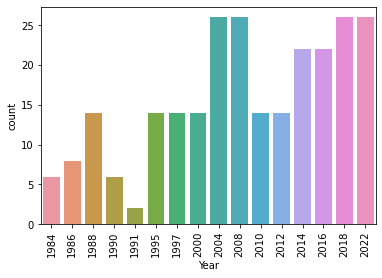

In [42]:
#No of matches played each year in asia cup
no_matches_plot= sns.countplot(x='Year',data=data_asia_cup)
plt.setp(no_matches_plot.get_xticklabels(), rotation=90)
plt.show()

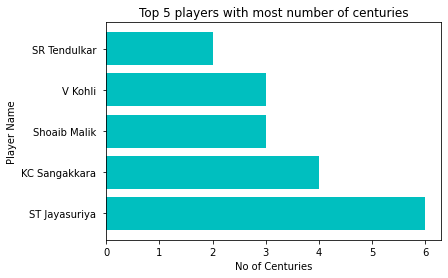

In [43]:
#Top 5 players with most number of centuries
bat_data_centuries = bat_data.sort_values('Centuries', ascending=False)
bat_data_centuries.head()
x_centuries = bat_data_centuries['Player Name'][0:5]
y_centuries = bat_data_centuries['Centuries'][0:5]
plt.title('Top 5 players with most number of centuries')
plt.ylabel('Player Name')
plt.xlabel('No of Centuries')
plt.barh(x_centuries,y_centuries,color='c')
plt.show()

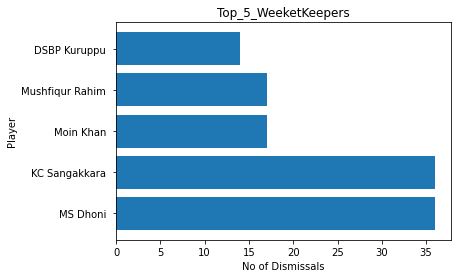

In [44]:
#Best weeket Keeper
x_wicketkeeper = wkd['Player Name'][0:5]
y_wicketkeeper = wkd['Dismissals'][0:5]
plt.ylabel('Player')
plt.xlabel('No of Dismissals')
plt.title('Top_5_WeeketKeepers')
plt.barh(x_wicketkeeper,y_wicketkeeper)
plt.show()

In [45]:
champion_data.head()

,Year,Host,Champion,Runner Up,Player Of The Series,Highest Run Scorer,Highest Wicket Taker
0,1984,UAE,India,Sri Lanka,Surinder Khanna,Surinder Khanna,Ravi Shastri
1,1986,Sri Lanka,Sri Lanka,Pakistan,Arjuna Ranatunga,Arjuna Ranatunga,Abdul Qadir
2,1988,Bangladesh,India,Sri Lanka,Navjot Sidhu,Ijaz Ahmed,Arshad Ayub
3,1990,India,India,Sri Lanka,Not Awarded,Arjuna Ranatunga,Kapil Dev
4,1995,UAE,India,Sri Lanka,Navjot Sidhu,Sachin Tendulkar,Anil Kumble


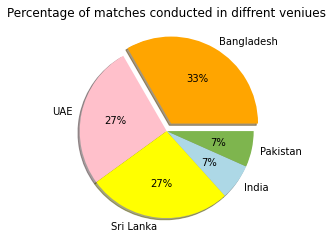

In [46]:
#Percentage of matches conducted in diffrent veniues visulization
hosts_no_data = champion_data['Host']
hosts_no_data = hosts_no_data.value_counts()
x_host = hosts_no_data.index
y_host = hosts_no_data.values
plt.title('Percentage of matches conducted in diffrent veniues')
plt.pie(y_host,labels=x_host,explode=(0.1,0,0,0,0),colors=['orange', 'pink', 'yellow', '#ADD8E6', '#7eb54e'],shadow=True,autopct='%1.0f%%')
plt.show()

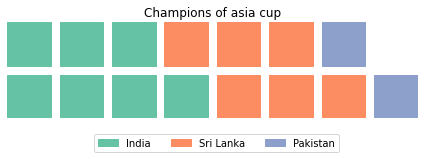

In [47]:
#chapions visulization
champion_no_data = champion_data['Champion']
champion_no_data = champion_no_data.value_counts()
fig_champion = plt.figure(
    FigureClass = Waffle,
    rows = 2,
    values = champion_no_data.values,
    labels = list(champion_no_data.index),
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0.2, -0.4),
        'ncol': len(champion_no_data)
    },
    title={
        'label': 'Champions of asia cup',
        'loc': 'center'
    },
)